In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

https://www.kaggle.com/discussions/general/74235
follow instructions

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
#kaggle datasets download -d tusharpadhy/deepfake-dataset

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cecilia0999","key":"cc1406dbb42304ade9f37c8885076ba5"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d tusharpadhy/deepfake-dataset


ref                                                 title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                  Vehicle Sales Data                        19MB  2024-02-21 20:16:17           9422        166  1.0              
arnavvvvv/spotify-music                             Top Spotify Songs                         47KB  2024-03-06 05:20:29           1331         30  1.0              
tarunrm09/climate-change-indicators                 Climate change Indicators                 34KB  2024-02-22 08:53:54           4857        108  1.0              
parasrupani/coffee-distribution-across-94-counties  Coffee Distribution Across 94 Counties   220KB  2024-02-28 01:49:07           1106         23  1.0              
zain280/ti

In [ ]:
! mkdir dataset
! unzip deepfake-dataset.zip -d dataset

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import PIL
import urllib
import os
import torchvision
from torchvision import datasets, models, transforms


# Check if GPU is available
if torch.cuda.is_available():
    print("GPU is enabled")
else:
    print("GPU is not enabled")

!nvidia-smi

GPU is enabled
Sat Mar  9 18:56:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              23W / 300W |      2MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------

In [ ]:
from torchvision import datasets, transforms
import os

def remove_duplicates(dataset):
    unique_items = {}
    for img, label in dataset.imgs:  # Iterate through the list of tuples (image_path, label)
        img_hash = hash(img)  # Hash the image path
        if img_hash not in unique_items:  # If this hash is not already in the unique items dict
            unique_items[img_hash] = (img, label)  # Add it

    # Rebuild the dataset imgs attribute with only unique items
    dataset.imgs = list(unique_items.values())
    dataset.samples = dataset.imgs  # In some versions, .samples is used instead of .imgs


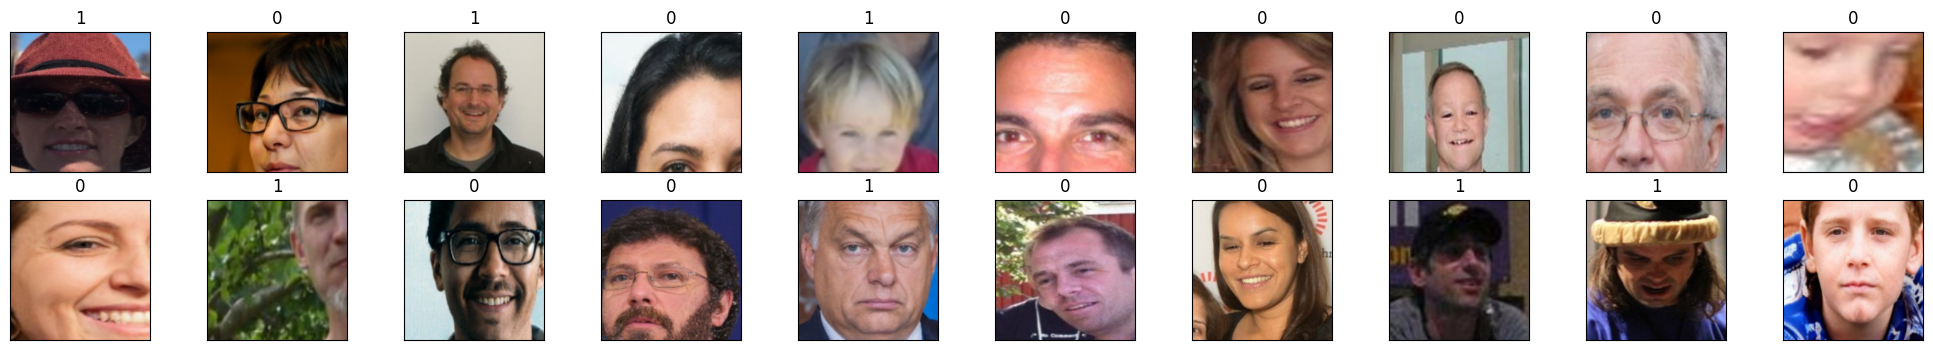

In [ ]:
# Visualize some sample data
# Obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()  # Convert images to numpy for display

# Plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    # Use the mapping to display the correct class name
    #label = idx_to_class[labels[idx].item()]
   # ax.set_title(labels)
    ax.set_title(labels[idx].item())
#0 false 1 true
plt.show()

### **AlexNet**

In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

Model

In [ ]:
def alexnet_model():
    # Start off the model
    model = Sequential()
    # 1st Convolution layer
    model.add(Conv2D(input_shape=(227,227,3), filters=96,kernel_size=(11,11),strides=(4,4),padding='valid'))
    model.add(Activation('relu'))
    # max pooling 1sst layer
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # 2nd Convolution layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # max pooling for 2nd layer
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # 3rd Convolution layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # 4th Convolution layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # 5th Convolution layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # max pooling for 5th layer
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

    # dense layer
    model.add(Flatten())
    # 1st dense layer
    model.add(Dense(4096, input_shape=(6*6*256,)))
    model.add(Activation('relu'))
    # dropout to prevent overfitting
    model.add(Dropout(0.4))

    # 2nd dense layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # drop out to prevent overfitting
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    # 3rd dense layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    # output layer
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # Uncomment line below to see architecture detail
    # model.summary()

    model.compile(loss='categorical_crossentropy', optimizer=optim.Adam(model.parameters(), lr=0.001), metrics=['accuracy'])
    return model

DATA Processing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

def dataset_train_processing():
    # Directories for your datasets
    train_dir = '/content/dataset/train'
    test_dir = '/content/dataset/test'
    val_dir = '/content/dataset/valid'

    batch_size = 256

    # Preprocessing and data augmentation configuration for training
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Just normalization for validation and test sets
    test_val_datagen = ImageDataGenerator(rescale=1./255)

    # Prepare data loaders
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='categorical'
    )

    validation_generator = test_val_datagen.flow_from_directory(
        val_dir,
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_val_datagen.flow_from_directory(
        test_dir,
        target_size=(227, 227),
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, validation_generator, test_generator, train_generator.samples, validation_generator.samples, test_generator.samples

# Example usage
# train_gen, val_gen, test_gen, train_size, val_size, test_size = dataset_train_processing_tf()


Train
train: Val = 4:1
train : test = 8 :1

In [ ]:
# Instantiate a model
model = alexnet_model()

# Process training data
train_gen, validate_gen,test_gen, train_total, validate_total,test_total = dataset_train_processing()

# Train model
batch_size = 256
epochs = 3
train_model = model.fit_generator(train_gen,
                                 epochs=epochs,
                                 validation_data=validate_gen,
                                 validation_steps=validate_total//batch_size,
                                 steps_per_epoch=train_total//batch_size)

#model.save_weights('/content/drive/MyDrive/APS360/alexnet.h5')

Found 240002 images belonging to 2 classes.
Found 59428 images belonging to 2 classes.
Found 30905 images belonging to 2 classes.


<ipython-input-27-a55b7b09d42e>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train_model = model.fit_generator(train_gen,


Epoch 1/3
937/937 [==============================] - 2721s 3s/step - loss: 0.6132 - accuracy: 0.6709 - val_loss: 0.8893 - val_accuracy: 0.6123
Epoch 2/3
937/937 [==============================] - 2689s 3s/step - loss: 0.3945 - accuracy: 0.8153 - val_loss: 0.3786 - val_accuracy: 0.8327
Epoch 3/3
937/937 [==============================] - 2672s 3s/step - loss: 0.3159 - accuracy: 0.8598 - val_loss: 0.3919 - val_accuracy: 0.8272


FileNotFoundError: [Errno 2] Unable to create file (unable to open file: name = '/content/drive/MyDrive/APS360/alexnet.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

**save weights**

In [ ]:
model.save_weights('alexnet.h5')

Reference(https://github.com/Insignite/Alexnet-DogvsCat-Classification/blob/master/Keras_Cat_Dog_Classification.ipynb)

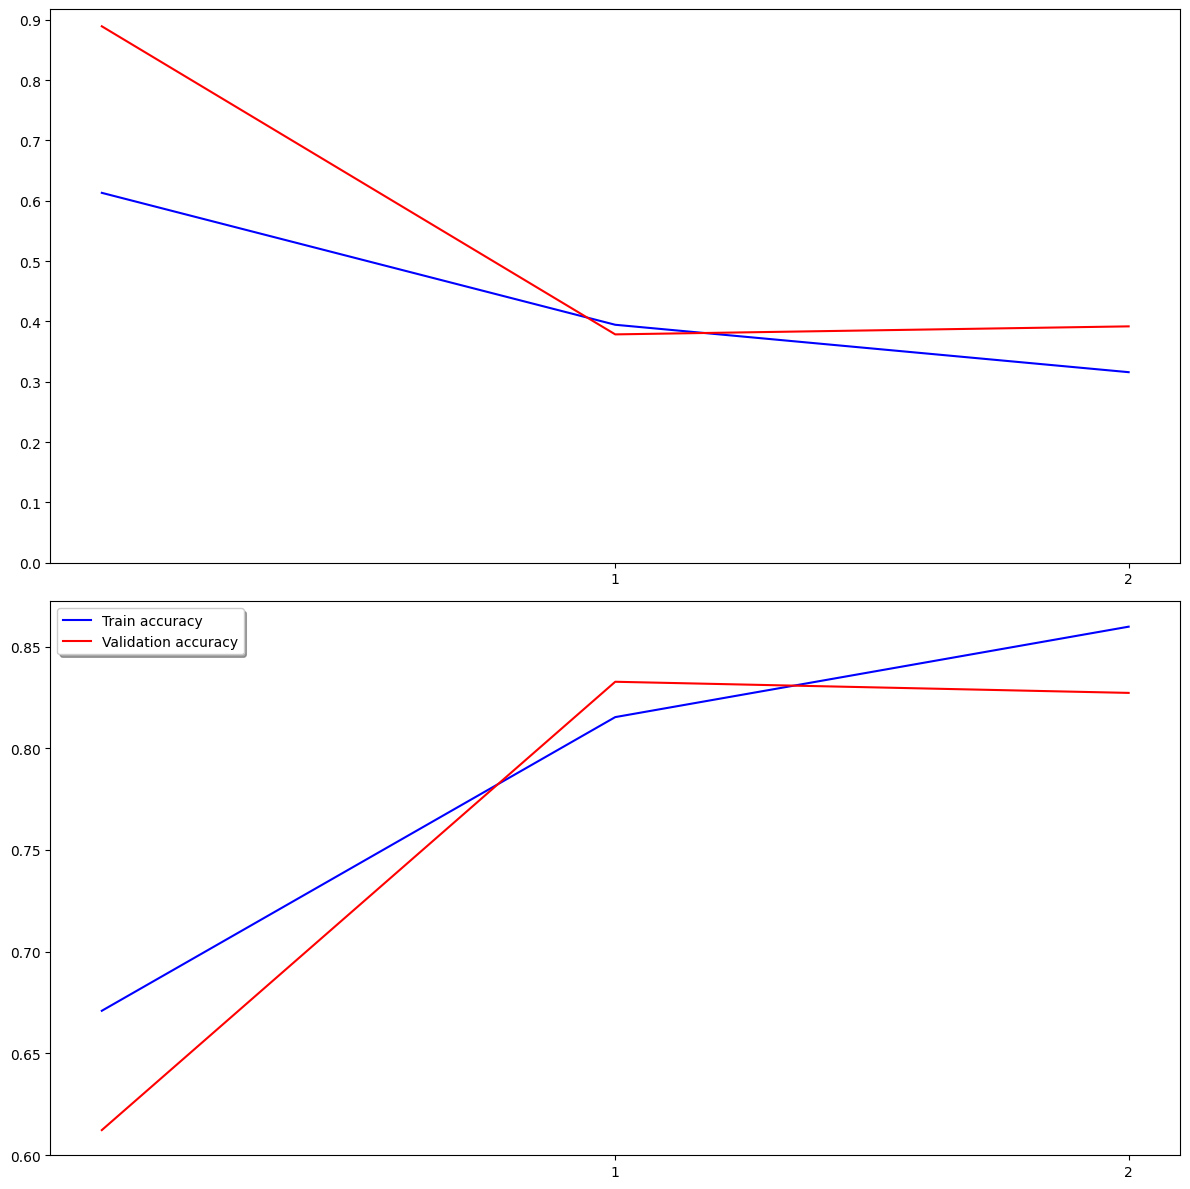

In [ ]:
# Graphing the result
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(train_model.history['loss'], color='b', label="Train loss")
ax1.plot(train_model.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(train_model.history['accuracy'], color='b', label="Train accuracy")
ax2.plot(train_model.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()